## 第49课 调整Activation Function参数对神经网络的影响

Python零基础学习建模：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode


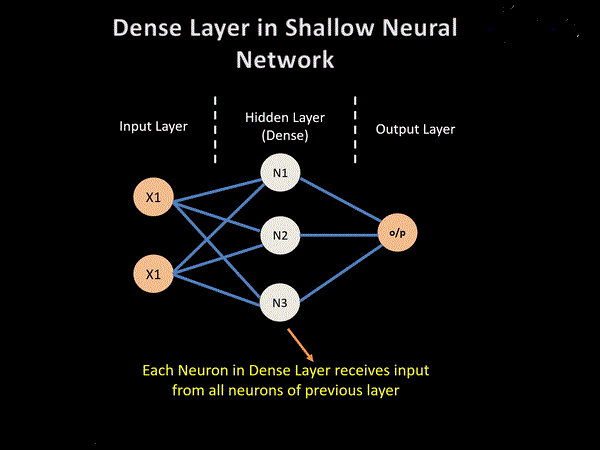

In [1]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson48-Keras-Dense-Layer.gif')

Inputs are fed into the perceptron

Weights are multiplied to each input

Summation and then add bias

Activation function is applied. Note that here we use a step function, but there are other more sophisticated activation functions like sigmoid, hyperbolic tangent (tanh), rectifier (relu) and more. No worries, we will cover many of them in the future!

Output is either triggered as 1, or not, as 0. Note we use y hat to label output produced by our perceptron model

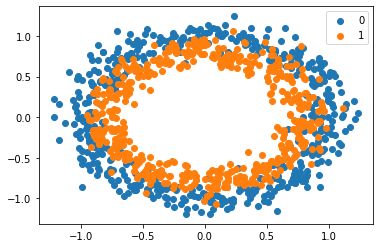

In [33]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
for i in range(2):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

Train: 0.810, Test: 0.844


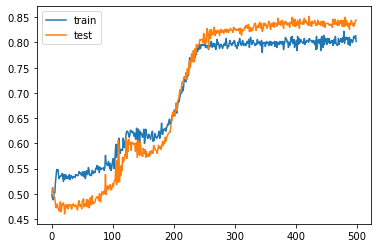

In [34]:
# mlp for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import RandomUniform
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# scale input data to [-1,1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
init = RandomUniform(minval=0, maxval=1)
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [35]:
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential

#Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with 
#suitable smoothness properties (e.g. differentiable or subdifferentiable).
#Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can 
#handle sparse gradients on noisy problems. Adam is relatively easy to configure where the default configuration parameters 
#do well on most problems
from keras.optimizers import SGD, adam

#Initializer that generates tensors with a uniform distribution
#A "Keras tensor" is a tensor that was returned by a Keras layer, (Layer class) or by Input
from keras.initializers import RandomUniform 


from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# scale input data to [-1,1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

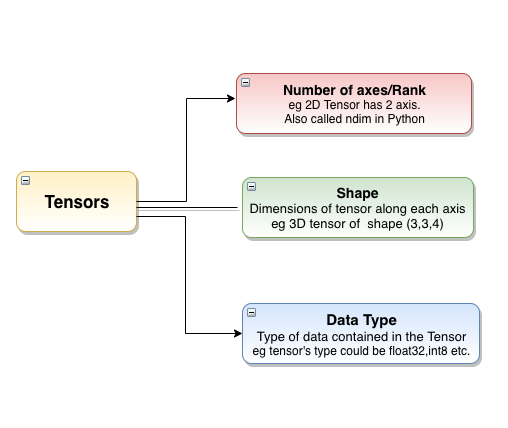

In [25]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson49-7.png')

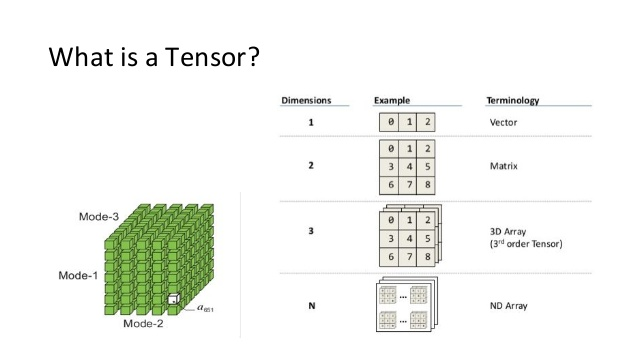

In [13]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson49-tensorflow.jpg')

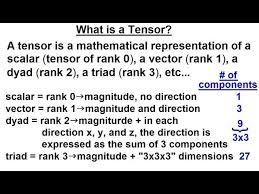

In [15]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson49-tensor3.jpg')

Train: 0.724, Test: 0.730


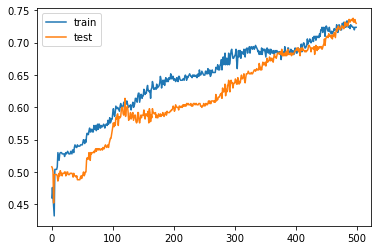

In [36]:
# define model
model = Sequential()
init = RandomUniform(minval=0, maxval=1)
model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Train: 0.534, Test: 0.474


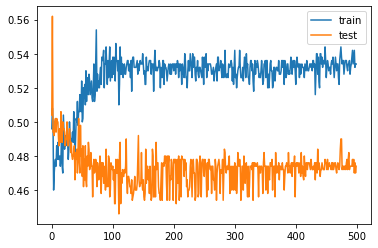

In [37]:
# define model
model = Sequential()
init = RandomUniform(minval=0, maxval=1)
model.add(Dense(5, input_dim=2, activation='sigmoid', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
#The number of hidden layers can be increased from 1 to 5

Train: 0.590, Test: 0.560


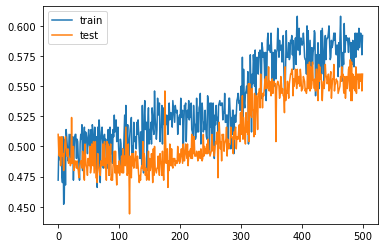

In [38]:
# define model
init = RandomUniform(minval=0, maxval=1)
model = Sequential()
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
#Initializers define the way to set the initial random weights of Keras layers. The keyword arguments used for passing 
#initializers to layers depends on the layer.
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Train: 0.834, Test: 0.842


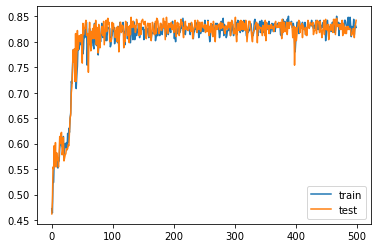

In [39]:
# define model
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform')) 
#he_uniform . Draws samples from a uniform distribution within [-limit, limit] , where limit = sqrt(6 / fan_in) 
#( fan_in is the number of input units in the weight tensor).

model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

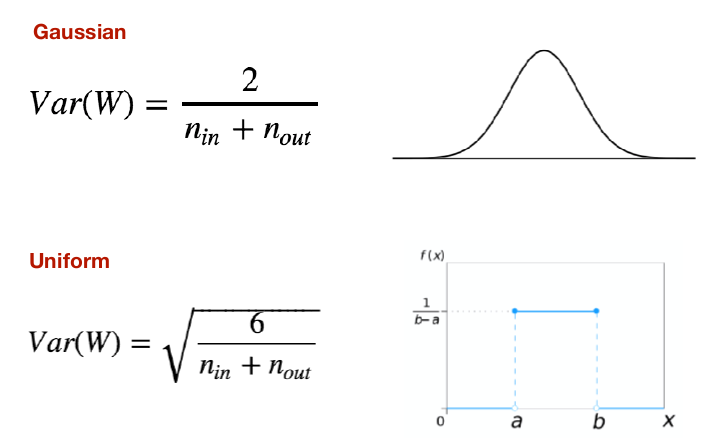

In [32]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson49-6.png')

Train: 0.504, Test: 0.496


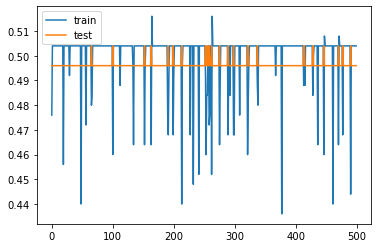

In [9]:
# define model
init = RandomUniform(minval=0, maxval=1)
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer=init))
model.add(Dense(5, activation='relu', kernel_initializer=init))
model.add(Dense(5, activation='relu', kernel_initializer=init))
model.add(Dense(5, activation='relu', kernel_initializer=init))
model.add(Dense(5, activation='relu', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()